In [318]:
# import libraries
import numpy as np
import pandas as pd

In [319]:
# Read the dataset into python
df = pd.read_csv('TermDeposit.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [321]:
df = df.drop(['contact','day', 'month', 'duration','campaign','pdays','previous','poutcome','education' ],axis=1)
df.head()

,age,job,marital,default,balance,housing,loan,y
0,58,management,married,no,2143,yes,no,no
1,44,technician,single,no,29,yes,no,no
2,33,entrepreneur,married,no,2,yes,yes,no
3,47,blue-collar,married,no,1506,yes,no,no
4,33,unknown,single,no,1,no,no,no


In [322]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      45211 non-null  int64 
 1   job      45211 non-null  object
 2   marital  45211 non-null  object
 3   default  45211 non-null  object
 4   balance  45211 non-null  int64 
 5   housing  45211 non-null  object
 6   loan     45211 non-null  object
 7   y        45211 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


In [323]:
# 1-married ; 2-divorced ; unknown-3
df['marital_status'] = np.where(df['marital'] =='married', 1,
                                        np.where(df['marital']=='divorced',2,
                                         3))
df.head()  

,age,job,marital,default,balance,housing,loan,y,marital_status
0,58,management,married,no,2143,yes,no,no,1
1,44,technician,single,no,29,yes,no,no,3
2,33,entrepreneur,married,no,2,yes,yes,no,1
3,47,blue-collar,married,no,1506,yes,no,no,1
4,33,unknown,single,no,1,no,no,no,3


In [324]:
# 1-admin ; 2-unemployed ; 3-management; 4-housemaid; 5-entrepreneur; 6-student; 7-blue-colla; 8-self-employed; 9-services; 10-retired; 11-technician; 12-unknown

df['job_category'] = np.where(df['job'] =='admin', 1,
                                         np.where(df['job']=='unemployed',2,
                                                  np.where(df['job']=='management',3,
                                                           np.where(df['job']=='housemaid',4,
                                                                    np.where(df['job']=='entrepreneur',5,
                                                                             np.where(df['job']=='student',6,
                                                                                      np.where(df['job']=='blue-collar',7,
                                                                                               np.where(df['job']=='self-employed',8,
                                                                                                        np.where(df['job']=='services',9,
                                                                                                                 np.where(df['job']=='retired',10,
                                                                                                                          np.where(df['job']=='technician',11,
                                                                                                        12)))))))))))
df.head()  

,age,job,marital,default,balance,housing,loan,y,marital_status,job_category
0,58,management,married,no,2143,yes,no,no,1,3
1,44,technician,single,no,29,yes,no,no,3,11
2,33,entrepreneur,married,no,2,yes,yes,no,1,5
3,47,blue-collar,married,no,1506,yes,no,no,1,7
4,33,unknown,single,no,1,no,no,no,3,12


In [325]:
# 1-yes ; 0-no

df['isHousing'] = np.where(df['housing'] =='yes', 1,
                                        np.where(df['housing']=='no',0,
                                         2))
df.head()  

,age,job,marital,default,balance,housing,loan,y,marital_status,job_category,isHousing
0,58,management,married,no,2143,yes,no,no,1,3,1
1,44,technician,single,no,29,yes,no,no,3,11,1
2,33,entrepreneur,married,no,2,yes,yes,no,1,5,1
3,47,blue-collar,married,no,1506,yes,no,no,1,7,1
4,33,unknown,single,no,1,no,no,no,3,12,0


In [326]:
# 1-yes ; 0-no

df['isLoan'] = np.where(df['loan'] =='yes', 1,
                                        np.where(df['loan']=='no',0,2))
df.head() 

,age,job,marital,default,balance,housing,loan,y,marital_status,job_category,isHousing,isLoan
0,58,management,married,no,2143,yes,no,no,1,3,1,0
1,44,technician,single,no,29,yes,no,no,3,11,1,0
2,33,entrepreneur,married,no,2,yes,yes,no,1,5,1,1
3,47,blue-collar,married,no,1506,yes,no,no,1,7,1,0
4,33,unknown,single,no,1,no,no,no,3,12,0,0


In [327]:
# 1-yes ; 0-no

df['has-default-credits'] = np.where(df['default'] =='yes', 1,
                                        np.where(df['default']=='no',0,2))
# these values are categorised and y will make bias on prediction
df = df.drop(['job','marital', 'default', 'housing','loan'],axis=1)
df.head()

,age,balance,y,marital_status,job_category,isHousing,isLoan,has-default-credits
0,58,2143,no,1,3,1,0,0
1,44,29,no,3,11,1,0,0
2,33,2,no,1,5,1,1,0
3,47,1506,no,1,7,1,0,0
4,33,1,no,3,12,0,0,0


In [328]:
df.describe()

,age,balance,marital_status,job_category,isHousing,isLoan,has-default-credits
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,1.680963,7.495079,0.555838,0.160226,0.018027
std,10.618762,3044.765829,0.884908,3.283634,0.496878,0.366820,0.133049
min,18.000000,-8019.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,1.000000,4.000000,0.000000,0.000000,0.000000
50%,39.000000,448.000000,1.000000,7.000000,1.000000,0.000000,0.000000
75%,48.000000,1428.000000,3.000000,11.000000,1.000000,0.000000,0.000000
max,95.000000,102127.000000,3.000000,12.000000,1.000000,1.000000,1.000000


<Axes: >

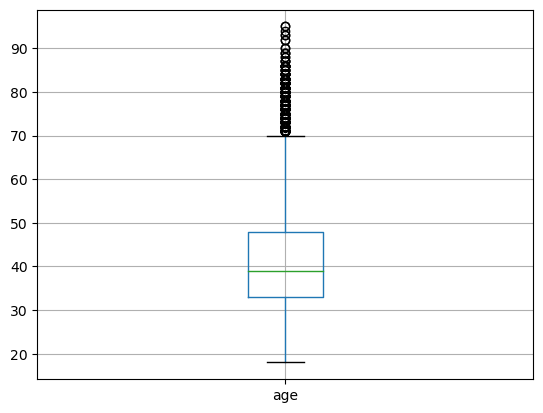

In [329]:
df.boxplot('age')


In [330]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

print(f"Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}")

Q1: 33.0 | Q3: 48.0 | IQR: 15.0 | LL: 10.5 | UL: 70.5


<Axes: >

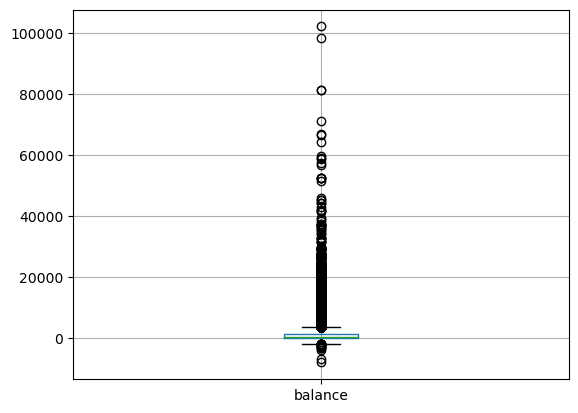

In [331]:
df.boxplot('balance')

In [332]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

print(f"Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}")

Q1: 72.0 | Q3: 1428.0 | IQR: 1356.0 | LL: -1962.0 | UL: 3462.0


In [257]:
from sklearn.preprocessing import RobustScaler


In [258]:
scaler = RobustScaler()


In [259]:
scaled_values = scaler.fit_transform(df[['balance']])
print(scaled_values)


[[ 1.25      ]
 [-0.30899705]
 [-0.32890855]
 ...
 [ 3.88421829]
 [ 0.16224189]
 [ 1.86061947]]


In [333]:
# categorize balance as 0 for negative, 1 for low, 2 for medium, 3 for high
bins = [-float('inf'), 0, 1000, 10000, float('inf')]
labels = [0, 1, 2, 3] 

df['balance_category'] = pd.cut(df['balance'], bins=bins, labels=labels, right=False)
df.head()

,age,balance,y,marital_status,job_category,isHousing,isLoan,has-default-credits,balance_category
0,58,2143,no,1,3,1,0,0,2
1,44,29,no,3,11,1,0,0,1
2,33,2,no,1,5,1,1,0,1
3,47,1506,no,1,7,1,0,0,2
4,33,1,no,3,12,0,0,0,1


In [334]:
df = df.drop(['balance'], axis=1)
df.head()

,age,y,marital_status,job_category,isHousing,isLoan,has-default-credits,balance_category
0,58,no,1,3,1,0,0,2
1,44,no,3,11,1,0,0,1
2,33,no,1,5,1,1,0,1
3,47,no,1,7,1,0,0,2
4,33,no,3,12,0,0,0,1


In [335]:
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]  # Define age groups
labels = range(len(bins) - 1)  # Generate numerical labels from 0 to n-1

# Categorize the age column
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels)
df = df.drop(['age'], axis=1)
df.dropna(subset=['age_category'], inplace=True)
df['age_category'].fillna(-1, inplace=True)

df.head()

,y,marital_status,job_category,isHousing,isLoan,has-default-credits,balance_category,age_category
0,no,1,3,1,0,0,2,3
1,no,3,11,1,0,0,1,2
2,no,1,5,1,1,0,1,1
3,no,1,7,1,0,0,2,2
4,no,3,12,0,0,0,1,1


In [336]:
# EDA

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline  

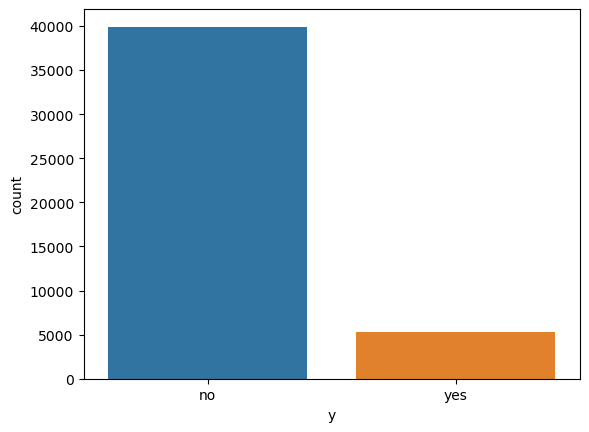

In [390]:
sns.countplot(x='y',data=df)
plt.show()



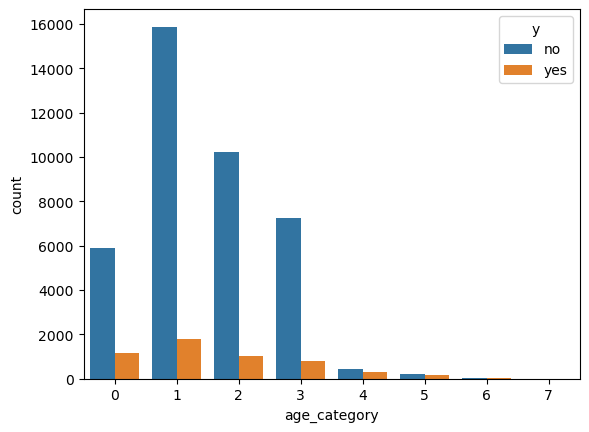

In [391]:
sns.countplot(x='age_category',hue='y',data=df)
plt.show()

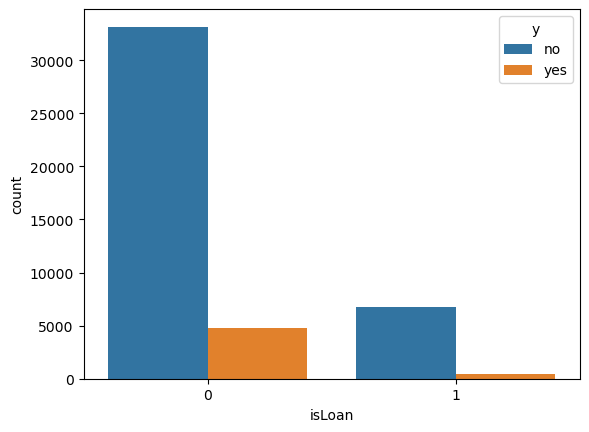

In [392]:
sns.countplot(x='isLoan',hue='y',data=df)
plt.show()

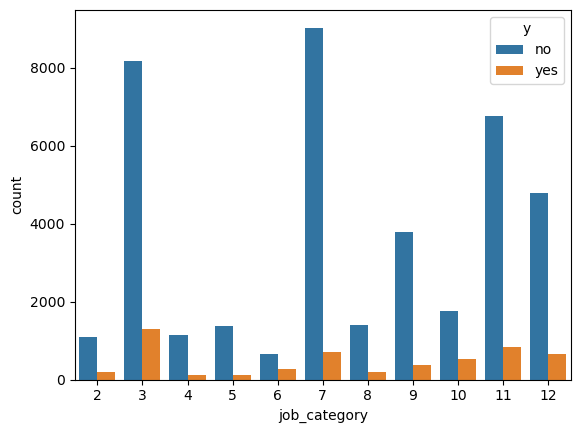

In [393]:
sns.countplot(x='job_category',hue='y',data=df)
plt.show()

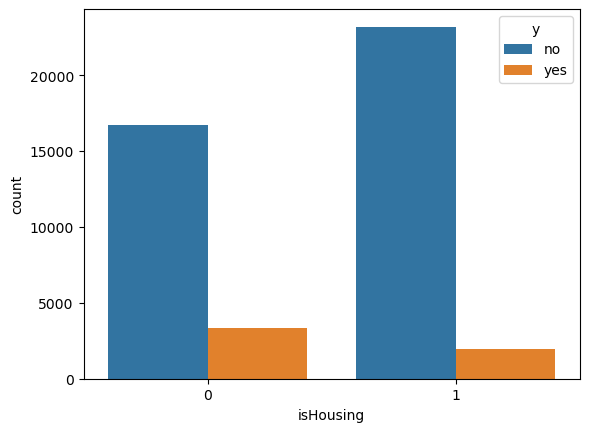

In [395]:
sns.countplot(x='isHousing',hue='y',data=df)
plt.show()

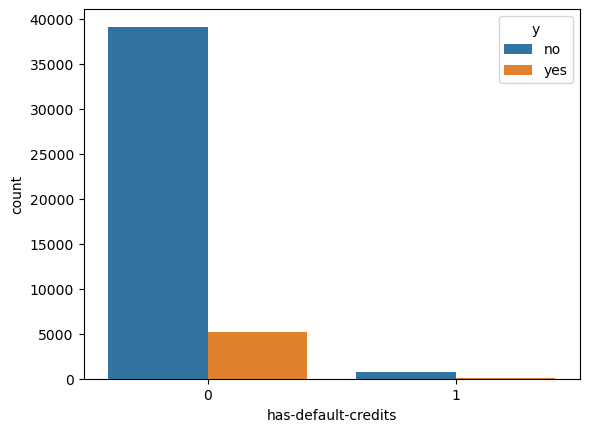

In [394]:
sns.countplot(x='has-default-credits',hue='y',data=df)
plt.show()

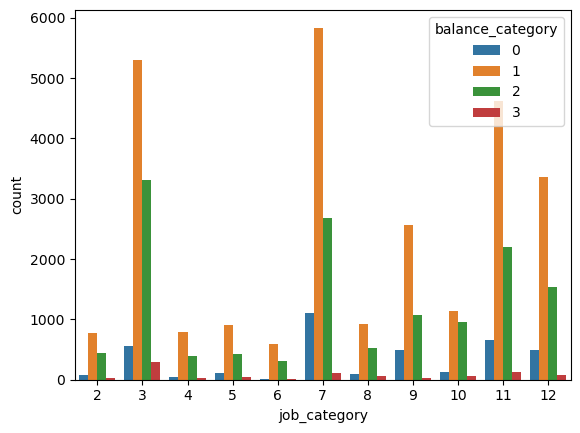

In [342]:
sns.countplot(x='job_category',hue='balance_category',data=df)
plt.show()

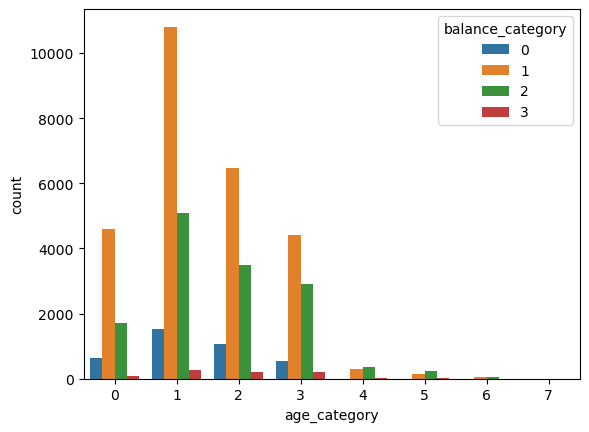

In [397]:
sns.countplot(x='age_category',hue='balance_category',data=df)
plt.show()

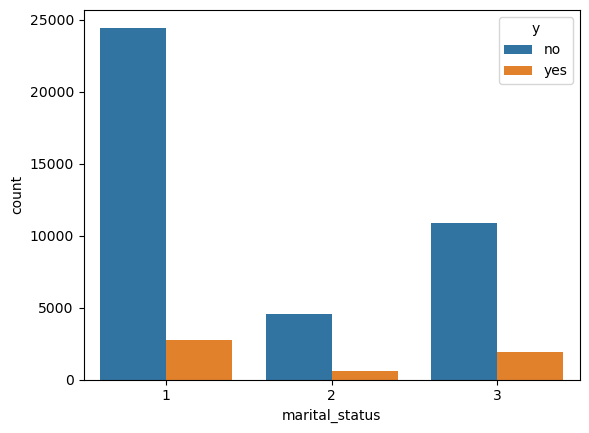

In [396]:
sns.countplot(x='marital_status',hue='y',data=df)
plt.show()

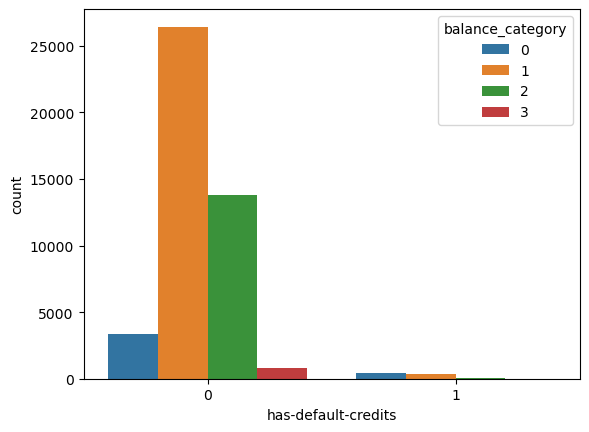

In [348]:
sns.countplot(x='has-default-credits',hue='balance',data=df)
plt.show()

In [349]:
# Machine Learning
# Split into features and target

X = df.drop(['y'],axis=1)
X.head()



,marital_status,job_category,isHousing,isLoan,has-default-credits,balance_category,age_category
0,1,3,1,0,0,2,3
1,3,11,1,0,0,1,2
2,1,5,1,1,0,1,1
3,1,7,1,0,0,2,2
4,3,12,0,0,0,1,1


In [350]:
Y = df['y']
Y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [351]:
from sklearn.model_selection import train_test_split

In [352]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [353]:
xtrain.head()

,marital_status,job_category,isHousing,isLoan,has-default-credits,balance_category,age_category
9324,1,12,0,0,0,2,1
44963,1,7,0,0,0,2,1
4194,2,11,1,0,0,1,1
20382,2,11,0,0,0,1,2
4497,1,7,1,1,0,1,1


In [354]:
ytrain.head()

9324     no
44963    no
4194     no
20382    no
4497     no
Name: y, dtype: object

In [355]:
xtest.head()

,marital_status,job_category,isHousing,isLoan,has-default-credits,balance_category,age_category
19892,3,11,0,0,0,2,1
898,1,12,1,0,0,1,2
41519,1,10,0,0,0,1,4
6431,1,3,1,0,0,3,1
15170,2,9,0,1,0,1,2


In [356]:
ytest.head()

19892    no
898      no
41519    no
6431     no
15170    no
Name: y, dtype: object

In [357]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [358]:
dt_model = DecisionTreeClassifier()

In [359]:
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [360]:
dt_model.score(xtrain,ytrain)

0.8860587958737797

In [361]:
dt_model.score(xtest,ytest)

0.881858407079646

In [362]:
# Predictions
ypred = dt_model.predict(xtest)
ytrainpred = dt_model.predict(xtrain)

In [363]:
from sklearn import metrics

In [364]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7988
         yes       0.35      0.02      0.03      1052

    accuracy                           0.88      9040
   macro avg       0.62      0.51      0.49      9040
weighted avg       0.82      0.88      0.83      9040



In [365]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94     31929
         yes       0.77      0.04      0.07      4230

    accuracy                           0.89     36159
   macro avg       0.83      0.52      0.51     36159
weighted avg       0.87      0.89      0.84     36159



In [366]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

In [367]:
nb_model = GaussianNB()

In [368]:
nb_model.fit(xtrain,ytrain)

GaussianNB()

In [369]:
ypred = nb_model.predict(xtest)
ytrainpred = nb_model.predict(xtrain)

In [370]:
nb_model.score(xtrain,ytrain)

0.8792831660167593

In [371]:
nb_model.score(xtest,ytest)

0.8811946902654867

In [372]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

          no       0.89      0.99      0.94      7988
         yes       0.43      0.07      0.12      1052

    accuracy                           0.88      9040
   macro avg       0.66      0.53      0.53      9040
weighted avg       0.84      0.88      0.84      9040



In [373]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

          no       0.89      0.99      0.94     31929
         yes       0.40      0.07      0.12      4230

    accuracy                           0.88     36159
   macro avg       0.65      0.53      0.53     36159
weighted avg       0.83      0.88      0.84     36159



In [374]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [375]:
rf_model = RandomForestClassifier()

In [376]:
rf_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [377]:
ypred = rf_model.predict(xtest)
ytrainpred = rf_model.predict(xtrain)

In [378]:
rf_model.score(xtest,ytest)

0.8817477876106194

In [379]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7988
         yes       0.35      0.02      0.04      1052

    accuracy                           0.88      9040
   macro avg       0.62      0.51      0.49      9040
weighted avg       0.82      0.88      0.83      9040



In [380]:
rf_model.score(xtrain,ytrain)

0.8860311402417103

In [381]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94     31929
         yes       0.73      0.04      0.08      4230

    accuracy                           0.89     36159
   macro avg       0.81      0.52      0.51     36159
weighted avg       0.87      0.89      0.84     36159



In [382]:
from sklearn.ensemble import GradientBoostingClassifier


In [383]:
gb_model = GradientBoostingClassifier()

In [384]:
gb_model.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [385]:
gb_model.score(xtest,ytest)

0.8837389380530973

In [386]:
gb_model.score(xtrain,ytrain)

0.8835697889875274

In [387]:
ypred = gb_model.predict(xtest)
ytrainpred = gb_model.predict(xtrain)

In [388]:
 print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94      7988
         yes       0.55      0.01      0.01      1052

    accuracy                           0.88      9040
   macro avg       0.71      0.50      0.47      9040
weighted avg       0.84      0.88      0.83      9040



In [389]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94     31929
         yes       0.72      0.01      0.02      4230

    accuracy                           0.88     36159
   macro avg       0.80      0.50      0.48     36159
weighted avg       0.86      0.88      0.83     36159

